In [1]:
%matplotlib ipympl
def figure(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, *args, **kwargs)

def figure3d(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, subplot_kw={"projection": "3d"}, *args, **kwargs)

import numpy as np
import pylab as plt
plt.style.use('default')

In [2]:
from ipywidgets import FloatSlider, HBox, Text
import numpy.fft as ft

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

(-1.2, 1.2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
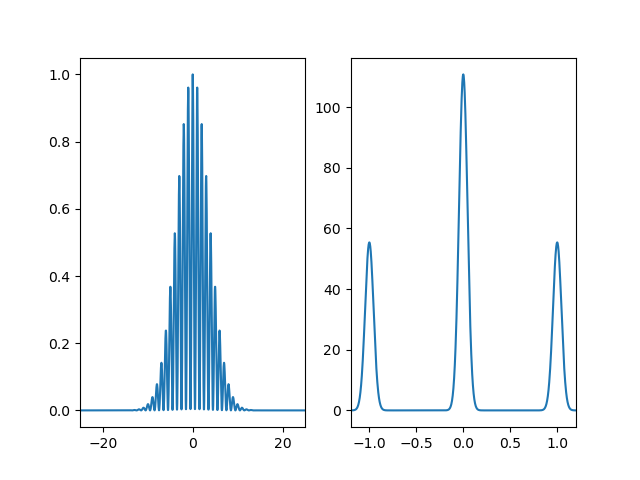

In [53]:
N = 400
Nt = 10000
x = np.linspace(-N//2, N//2, Nt, endpoint=False)
W = 5
func = 0.5 * (1 + np.cos(2*np.pi*x)) * np.exp(-(x**2)/W**2)
# func =  np.exp(-(x**2)/W**2)

ft_func = ft.fftshift(ft.fft(func))
f = ft.fftshift(ft.fftfreq(Nt, d=x[1]-x[0]))
fig, ax = figure(1, 1, 2)
ax[0].plot(x, func)
ax[1].plot(f, np.abs(ft_func))
ax[0].set_xlim([-25.1, 25.1])
ax[1].set_xlim([-1.2, 1.2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
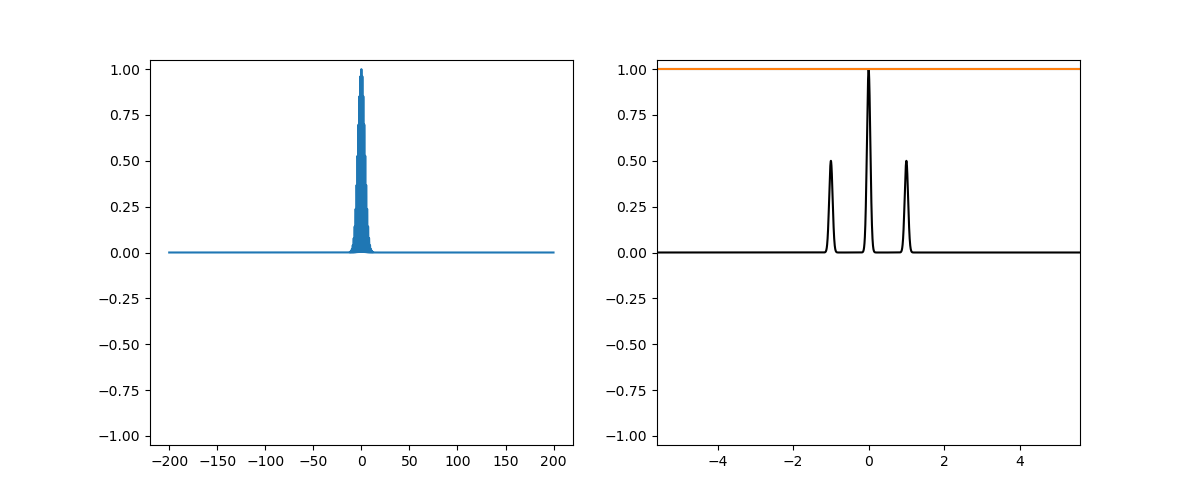

In [55]:
def get_slider():
    sk = FloatSlider(
        orientation='horizontal', description='k: ',
        value=1, min=.1, max=10, step=1/5
    )
    sz = FloatSlider(
        orientation='horizontal', description='z: ',
        value=0, min=0, max=200, step=0.1
    )
    ft_func = ft.fftshift(ft.fft(func))
    f = ft.fftshift(ft.fftfreq(Nt, d=x[1]-x[0]))

    k = sk.value*np.pi
    z = sz.value
    fac = np.exp(1j * np.sqrt(k**2 - f.astype(np.complex)**2) * z)
    w = f.astype(np.complex) * 2*np.pi
    

    fig, ax = figure(4, 1, 2, figsize=(12, 5))
    lines = []
    lines.append(ax[0].plot(x, ft.ifft(ft.ifftshift(ft_func)))[0])
    lines.append(ax[1].plot(x, fac)[0])
    lines.append(ax[1].plot(x, fac)[0])
    lines.append(ax[1].plot(f, np.abs(ft_func)/np.max(np.abs(ft_func)), 'k', zorder=0)[0])

    # ax[0].set_xlim([-25.1, 25.1])        
    ax[0].set_ylim([-1.05, 1.05])
    ax[1].set_ylim([-1.05, 1.05])
    ax[1].set_xlim([-5.6, 5.6])
    
    def redraw(change):
        k = sk.value*np.pi
        z = sz.value
        fac = np.exp(1j * np.sqrt(k**2 - w**2) * z)
        
        lines[0].set_data(x, np.real(ft.ifft(ft.ifftshift(ft_func*fac))))

        lines[1].set_data(f, np.real(fac))
        lines[2].set_data(f, np.imag(fac))

            
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sk.observe(redraw, names='value')
    sz.observe(redraw, names='value')
    return HBox([sk, sz])

get_slider()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
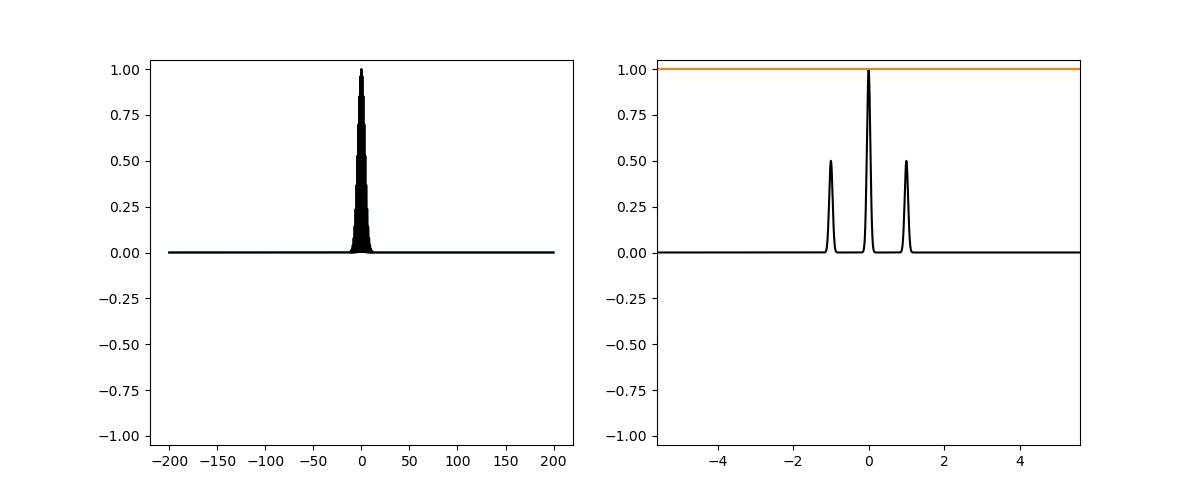

In [56]:
def get_slider():
    sk = FloatSlider(
        orientation='horizontal', description='k: ',
        value=1, min=.1, max=10, step=1/5
    )
    sz = FloatSlider(
        orientation='horizontal', description='z: ',
        value=0, min=0, max=200, step=0.1
    )
    ft_func = ft.fftshift(ft.fft(func))
    f = ft.fftshift(ft.fftfreq(Nt, d=x[1]-x[0]))

    k = sk.value*np.pi
    z = sz.value
    fac = np.exp(1j * np.sqrt(k**2 - f.astype(np.complex)**2/(2*k)) * z)
    w = f.astype(np.complex)*2*np.pi

    fig, ax = figure(5, 1, 2, figsize=(12, 5))
    lines = []
    lines.append(ax[0].plot(x, ft.ifft(ft.ifftshift(ft_func)))[0])
    lines.append(ax[0].plot(x, np.abs(ft.ifft(ft.ifftshift(ft_func))), 'k-')[0])
    lines.append(ax[1].plot(x, fac)[0])
    lines.append(ax[1].plot(x, fac)[0])
    lines.append(ax[1].plot(f, np.abs(ft_func)/np.max(np.abs(ft_func)), 'k', zorder=0)[0])

    # ax[0].set_xlim([-25.1, 25.1])        
    ax[0].set_ylim([-1.05, 1.05])
    ax[1].set_ylim([-1.05, 1.05])
    ax[1].set_xlim([-5.6, 5.6])
    
    def redraw(change):
        k = sk.value*np.pi
        z = sz.value
        fac = np.exp(1j * (k - w**2/(2*k)) * z)
        
        lines[0].set_data(x, np.real(ft.ifft(ft.ifftshift(ft_func*fac))))
        lines[1].set_data(x, np.abs(ft.ifft(ft.ifftshift(ft_func*fac))))

        lines[2].set_data(f, np.real(fac))
        lines[3].set_data(f, np.imag(fac))

            
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    sk.observe(redraw, names='value')
    sz.observe(redraw, names='value')
    return HBox([sk, sz])

get_slider()